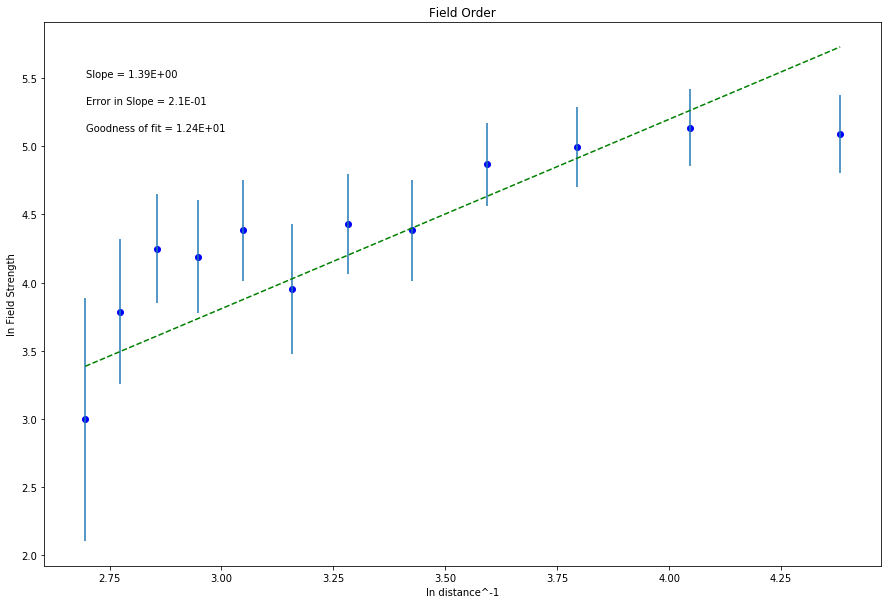

In [1]:
#Physics 216
#Plotting code to use the whole year!
#Jaylene Naylor
#September 2015, modified Sept 2017, August 2018
#-------------------------------------------#
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from autoErr import autoErr

#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations

def arr_with_err(err, ls):
    return np.array(list(map(lambda v: autoErr(v, err),ls)))

radii_1 = arr_with_err(0.1, [7,6.5,6,5.5,5,4.5,4,3.5,3,2.5,2,1.5,1])/100 #meters
voltages_1 = arr_with_err(0.1, [10,9.9,9.68,9.33,9,8.6,8.34,7.92,7.52,6.87,6.13,5.28,4.47]) #Volts

radii_2 = radii_1 #meters
voltages_2 = arr_with_err(0.1, [9.6,9.5,9.45,9.35,8.87,8.73,8.28,8,7.5,6.8,6.2,5.39,4.85]) #Volts

radii_3 = radii_1 #meters
voltages_3 = arr_with_err(0.1, [9.13,8.8,8.55,8.25,8,7.7,7.5,7.1,6.65,5.82,5.355,4.75,3.7]) #Volts

radii = radii_1
voltages = voltages_1

diff_voltages = np.diff(voltages)
diff_radii = np.diff(radii)
mid_radii = (radii[:-1] + radii[1:]) / 2

Es = diff_voltages / diff_radii
ln_Es = np.log(np.vectorize(float)(Es))
ln_Rs = np.log(np.vectorize(float)(mid_radii))

#--------------------------------------------#
#Create arrays for uncertainties
#CHANGE THE VARIABLE NAME and numbers to match your data 
err_ln_Es = np.log(np.vectorize(lambda v: v.split()[1])(Es))-ln_Es


#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic

x = -ln_Rs   #this should be the array you want to plot on the x axis
y = ln_Es
dy = err_ln_Es  #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('ln distance^-1')
plt.ylabel('ln Field Strength')
plt.title('Field Order')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()
